## DIMENSIONALITY REDUCTION WITH PRINCIPAL COMPONENT ANALYSIS

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.cluster import KMeans,DBSCAN,AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler

sns.set_style('darkgrid')
sns.set_palette('husl')

In [4]:
data = pd.read_csv('cleaned_marketing.csv')

In [8]:
data.head(4)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138,0,0,9/4/2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344,1,1,3/8/2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613,0,0,8/21/2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646,1,0,2/10/2014,26,11,...,6,0,0,0,0,0,0,3,11,0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4   Income               2240 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [10]:
data = data.astype({'ID':'object'})
# data['Dt_Customer'] = data['Dt_Customer'].apply(pd.to_datetime)

data['age'] = [2024 - x for x in data['Year_Birth']]
data.drop(columns=['Year_Birth'], inplace=True)

In [11]:
data['Marital_Status'] = ['single' if x in ['Single', 'Alone','Absurd', 'YOLO']
                          else x for x in data['Marital_Status']]

In [12]:
data.isna().sum()

ID                     0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
age                    0
dtype: int64

In [21]:
# label encode the categorical variables

encoder = LabelEncoder()
cat_cols = ['Education', 'Marital_Status']

for col in cat_cols:
    data[col] = encoder.fit_transform(data[col])

In [22]:
data.head(4)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,2,4,58138,0,0,9/4/2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,2,4,46344,1,1,3/8/2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,2,5,71613,0,0,8/21/2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,2,5,26646,1,0,2/10/2014,26,11,...,6,0,0,0,0,0,0,3,11,0


In [23]:
data.drop(['ID','Dt_Customer'], axis =1, inplace= True)

In [24]:
data.head(4)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,1957,2,4,58138,0,0,58,635,88,546,...,7,0,0,0,0,0,0,3,11,1
1,1954,2,4,46344,1,1,38,11,1,6,...,5,0,0,0,0,0,0,3,11,0
2,1965,2,5,71613,0,0,26,426,49,127,...,4,0,0,0,0,0,0,3,11,0
3,1984,2,5,26646,1,0,26,11,4,20,...,6,0,0,0,0,0,0,3,11,0


In [25]:
data = data.astype({'Income':'int'}, copy=True, errors='ignore')

In [26]:
data = data[data['Income'] != ' ']

In [27]:
data.reset_index(drop=True, inplace=True)

In [28]:
data.head(5)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,1957,2,4,58138,0,0,58,635,88,546,...,7,0,0,0,0,0,0,3,11,1
1,1954,2,4,46344,1,1,38,11,1,6,...,5,0,0,0,0,0,0,3,11,0
2,1965,2,5,71613,0,0,26,426,49,127,...,4,0,0,0,0,0,0,3,11,0
3,1984,2,5,26646,1,0,26,11,4,20,...,6,0,0,0,0,0,0,3,11,0
4,1981,4,3,58293,1,0,94,173,43,118,...,5,0,0,0,0,0,0,3,11,0


<Axes: >

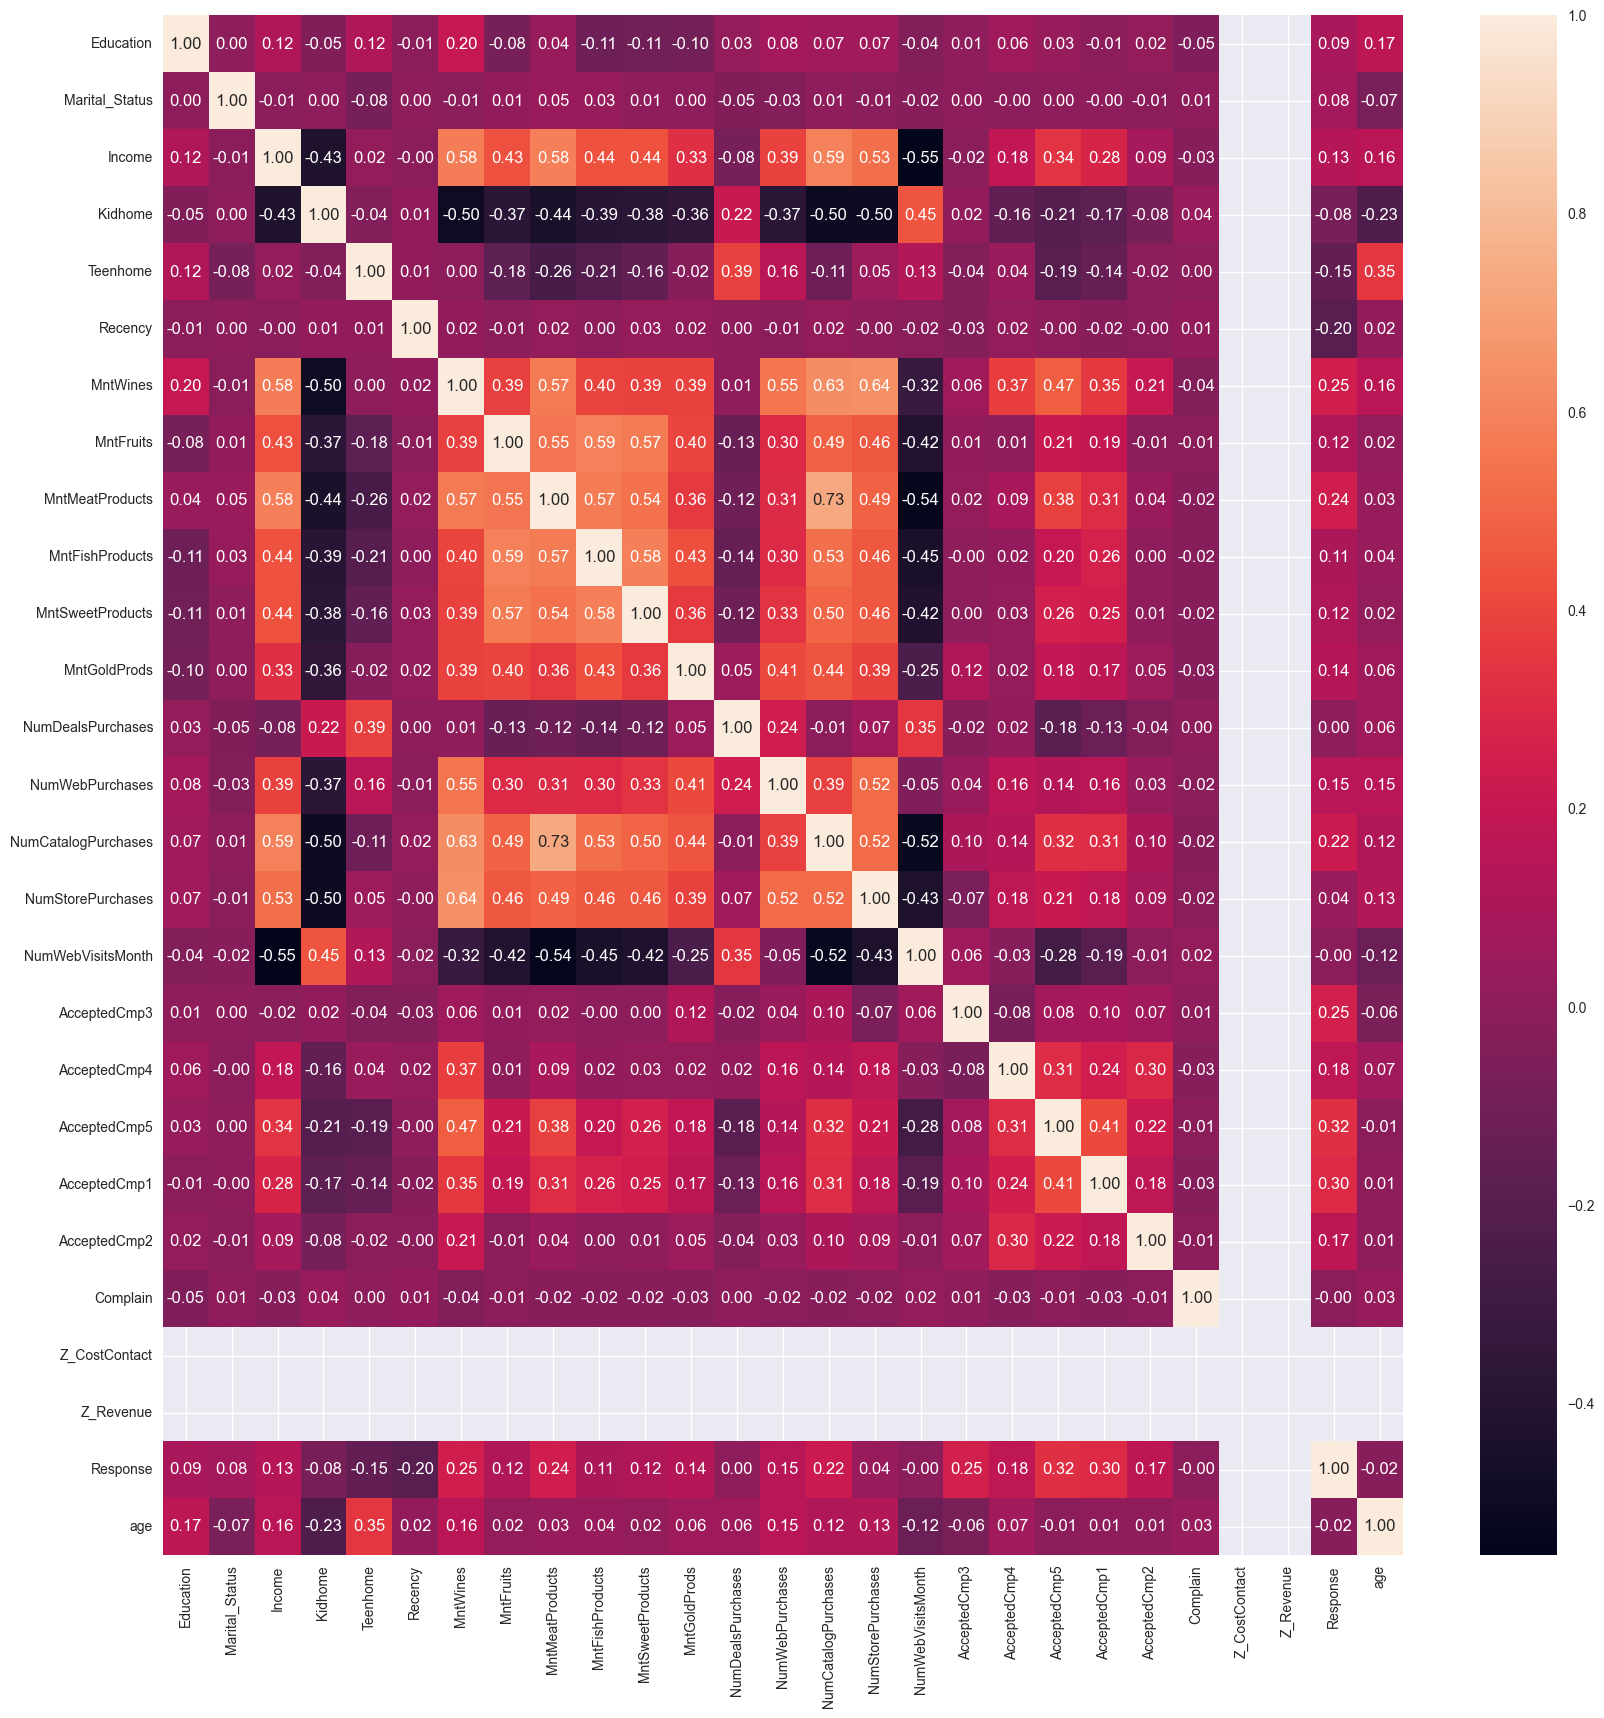

In [28]:
corr = data.corr(method='pearson')
fig = plt.figure(figsize= (20,20))
sns.heatmap(data = corr, fmt= '0.02f', annot=True)

In [32]:
#scale the data
scaler= StandardScaler()
data_scaled= scaler.fit_transform(data)
data_scaled

array([[-0.98644293, -0.35052725,  0.25421812, ...,  0.        ,
         0.        ,  2.37795178],
       [-1.23680074, -0.35052725,  0.25421812, ...,  0.        ,
         0.        , -0.42052997],
       [-0.31882209, -0.35052725,  1.18230273, ...,  0.        ,
         0.        , -0.42052997],
       ...,
       [ 1.01641959, -0.35052725, -1.60195109, ...,  0.        ,
         0.        , -0.42052997],
       [-1.06989553,  0.53924181,  1.18230273, ...,  0.        ,
         0.        , -0.42052997],
       [-1.23680074,  1.42901088, -0.67386649, ...,  0.        ,
         0.        ,  2.37795178]])

In [35]:
data_scaled= pd.DataFrame(data=data_scaled, columns=data.columns)
data_scaled.head(4)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,-0.986443,-0.350527,0.254218,0.234063,-0.823039,-0.928972,0.310532,0.978226,1.549429,1.690227,...,0.693232,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812,0.0,0.0,2.377952
1,-1.236801,-0.350527,0.254218,-0.234559,1.039938,0.909066,-0.380509,-0.872024,-0.637328,-0.717986,...,-0.131574,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812,0.0,0.0,-0.420530
2,-0.318822,-0.350527,1.182303,0.769478,-0.823039,-0.928972,-0.795134,0.358511,0.569159,-0.178368,...,-0.543978,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812,0.0,0.0,-0.420530
3,1.266777,-0.350527,1.182303,-1.017239,1.039938,-0.928972,-0.795134,-0.872024,-0.561922,-0.655551,...,0.280829,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812,0.0,0.0,-0.420530


In [37]:
#### FEATURE REDUCTION 
# achieving feature reduction using PCA
pca= PCA(n_components=3)
reduced_data= pca.fit_transform(data_scaled)
reduced_data= pd.DataFrame(data= reduced_data, columns= ['column1', 'column2', 'column3'])

reduced_data.head(4)


,column1,column2,column3
0,3.764285,-0.298325,-0.391963
1,-2.384290,0.180747,-0.233266
2,1.621714,-0.170128,-1.122169
3,-2.517016,-1.435828,0.218530


Text(0.5, 1.0, 'COLUMN2 VS COLUMN3')

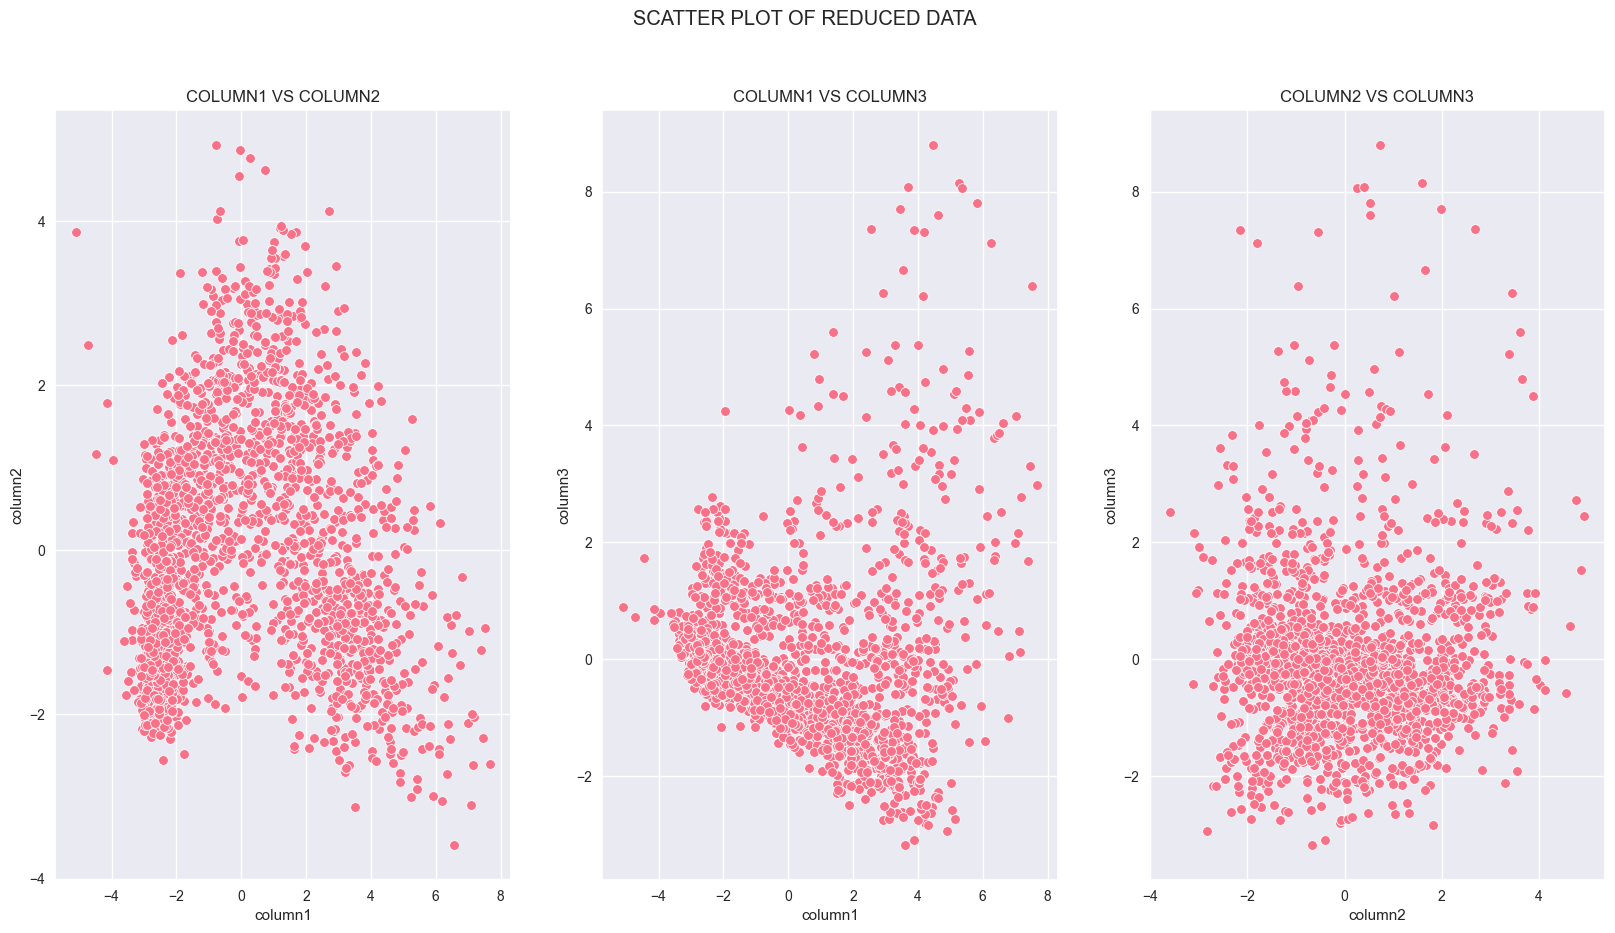

In [40]:
# plotting scatter chart of column relationship
#seaborn way
fig, axes = plt.subplots(1,3, figsize= (20, 10))
sns.scatterplot(data=reduced_data, x='column1', y='column2', ax= axes[0])
sns.scatterplot(data=reduced_data, x='column1', y='column3', ax= axes[1])
sns.scatterplot(data=reduced_data, x='column2', y='column3', ax= axes[2])

plt.suptitle('SCATTER PLOT OF REDUCED DATA')

axes[0].set_title('COLUMN1 VS COLUMN2')
axes[1].set_title('COLUMN1 VS COLUMN3')
axes[2].set_title('COLUMN2 VS COLUMN3')



Text(0.5, 0.92, '3D SCATTER PLOT OF THE THREE COLUMNS')

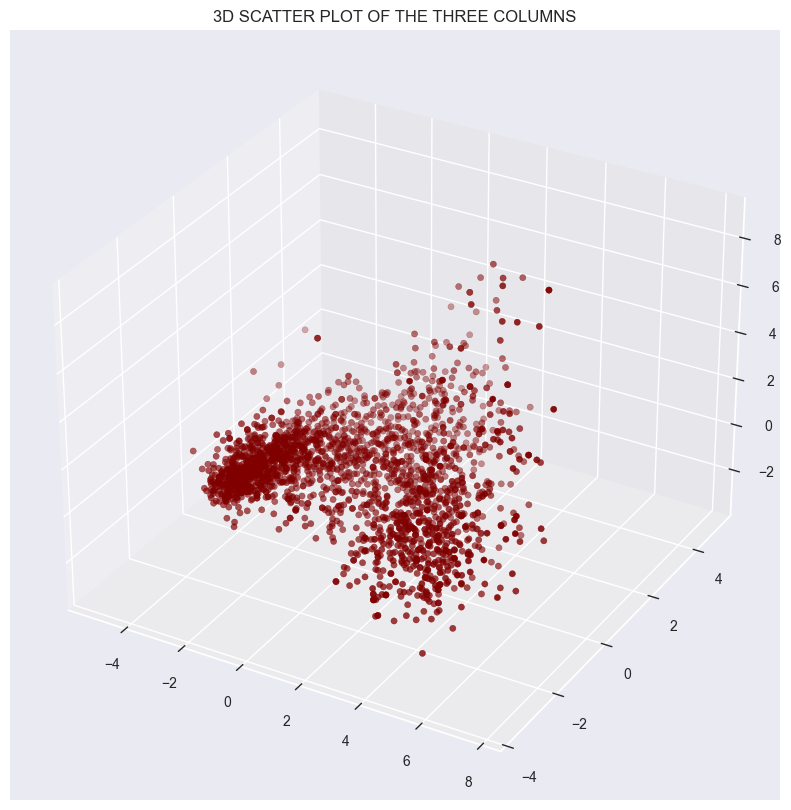

In [41]:
# 3d plot of the reduced dimension plt
x = reduced_data['column1']
y = reduced_data['column2']
z = reduced_data['column3']

fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(111, projection = '3d')
ax.scatter(x,y,z, c = 'maroon', marker= 'o')

ax.set_title('3D SCATTER PLOT OF THE THREE COLUMNS')


In [43]:
# plotly 3d
px.scatter_3d(
    data_frame =  reduced_data, x= 'column1', y= 'column2', z= 'column3'
)

In [45]:
# kmeans clustering (this returns partitionaing based on instruction given to it)
kmeans = KMeans(n_clusters= 4)

preds = kmeans.fit_predict(reduced_data)

preds

array([1, 3, 1, ..., 0, 0, 3])

In [46]:
preds[:10]

array([1, 3, 1, 3, 0, 0, 0, 3, 3, 3])

In [25]:
# train a kmeans on the best K

Text(0.5, 0.92, '3D SCATTER PLOT OF THE THREE COLUMNS')

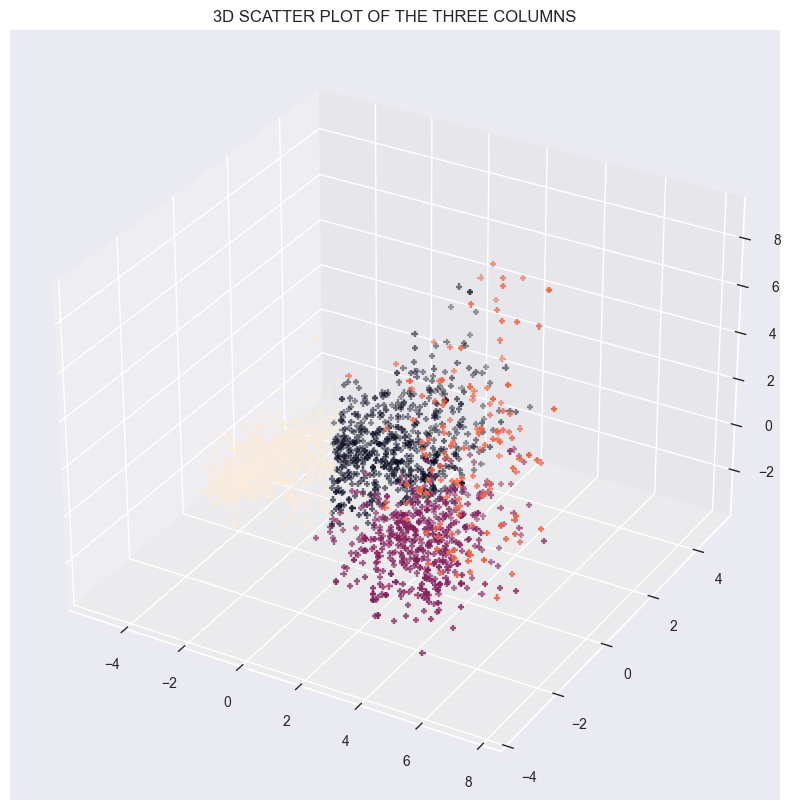

In [47]:

x = reduced_data['column1']
y = reduced_data['column2']
z = reduced_data['column3']

fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(111, projection = '3d')
ax.scatter(x,y,z, c= preds, marker= '+')

ax.set_title('3D SCATTER PLOT OF THE THREE COLUMNS')

In [49]:
px.scatter_3d(
    data_frame =  reduced_data, x= 'column1', y= 'column2', z= 'column3', color= preds
)

In [50]:
data['clusters'] = ['cluster1' if x == 0 else 'cluster2' if x == 1
                    else 'cluster3' if x == 2 else 'cluster4' for x in preds]

In [51]:
data.head(4)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,clusters
0,1957,2,4,58138,0,0,58,635,88,546,...,0,0,0,0,0,0,3,11,1,cluster2
1,1954,2,4,46344,1,1,38,11,1,6,...,0,0,0,0,0,0,3,11,0,cluster4
2,1965,2,5,71613,0,0,26,426,49,127,...,0,0,0,0,0,0,3,11,0,cluster2
3,1984,2,5,26646,1,0,26,11,4,20,...,0,0,0,0,0,0,3,11,0,cluster4


<Axes: xlabel='clusters', ylabel='children'>

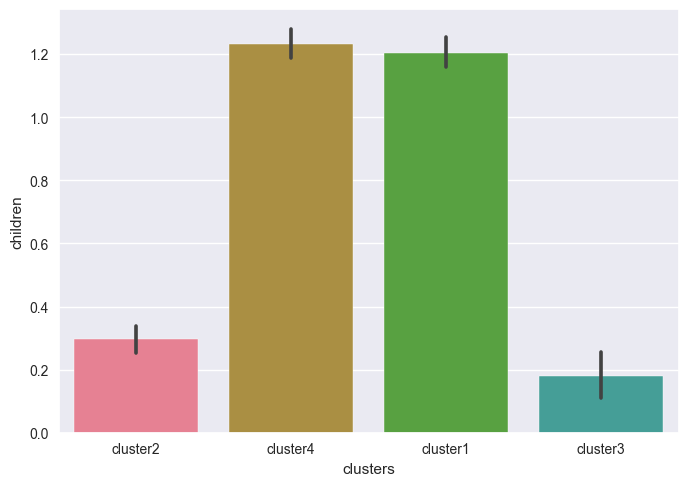

In [59]:
# 3d of reduced dimension with clusters

data['children'] = data['Kidhome'] + data['Teenhome']

sns.barplot(data=data, x = 'clusters', y = 'children', hue= 'clusters')

<Axes: xlabel='clusters', ylabel='children'>

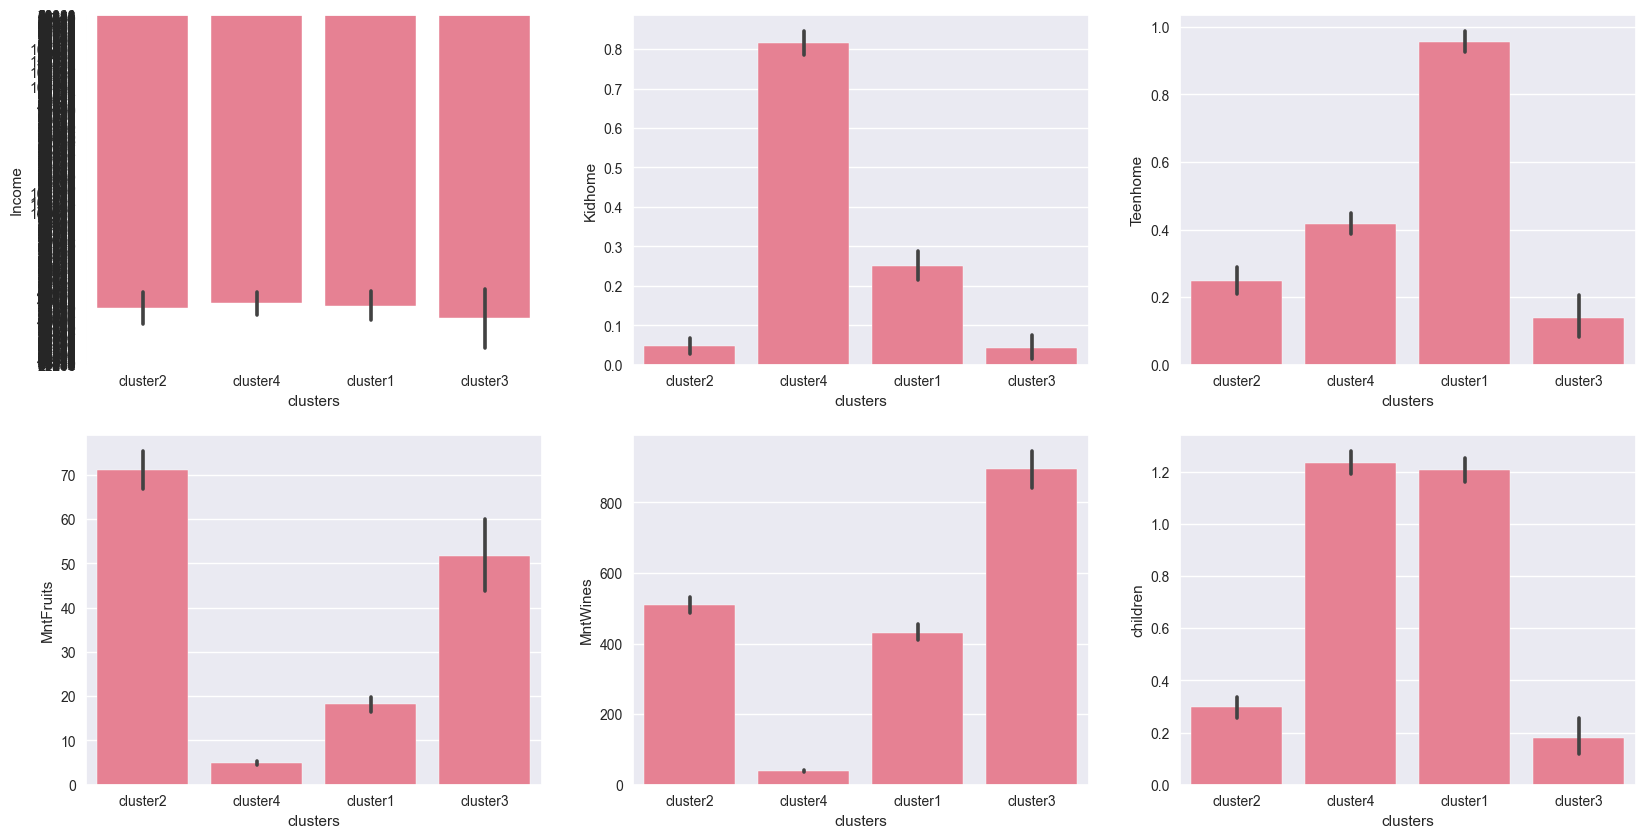

In [58]:
fig, axes = plt.subplots(2,3, figsize= (20, 10))
sns.barplot(data= data, x= 'clusters', y= 'Income', ax= axes[0,0])
sns.barplot(data= data, x= 'clusters', y= 'Kidhome', ax= axes[0,1])
sns.barplot(data= data, x= 'clusters', y= 'Teenhome', ax= axes[0,2])
sns.barplot(data= data, x= 'clusters', y= 'MntFruits', ax= axes[1,0])
sns.barplot(data= data, x= 'clusters', y= 'MntWines', ax= axes[1,1])
sns.barplot(data= data, x= 'clusters', y= 'children', ax= axes[1,2])

<Axes: xlabel='clusters', ylabel='children'>

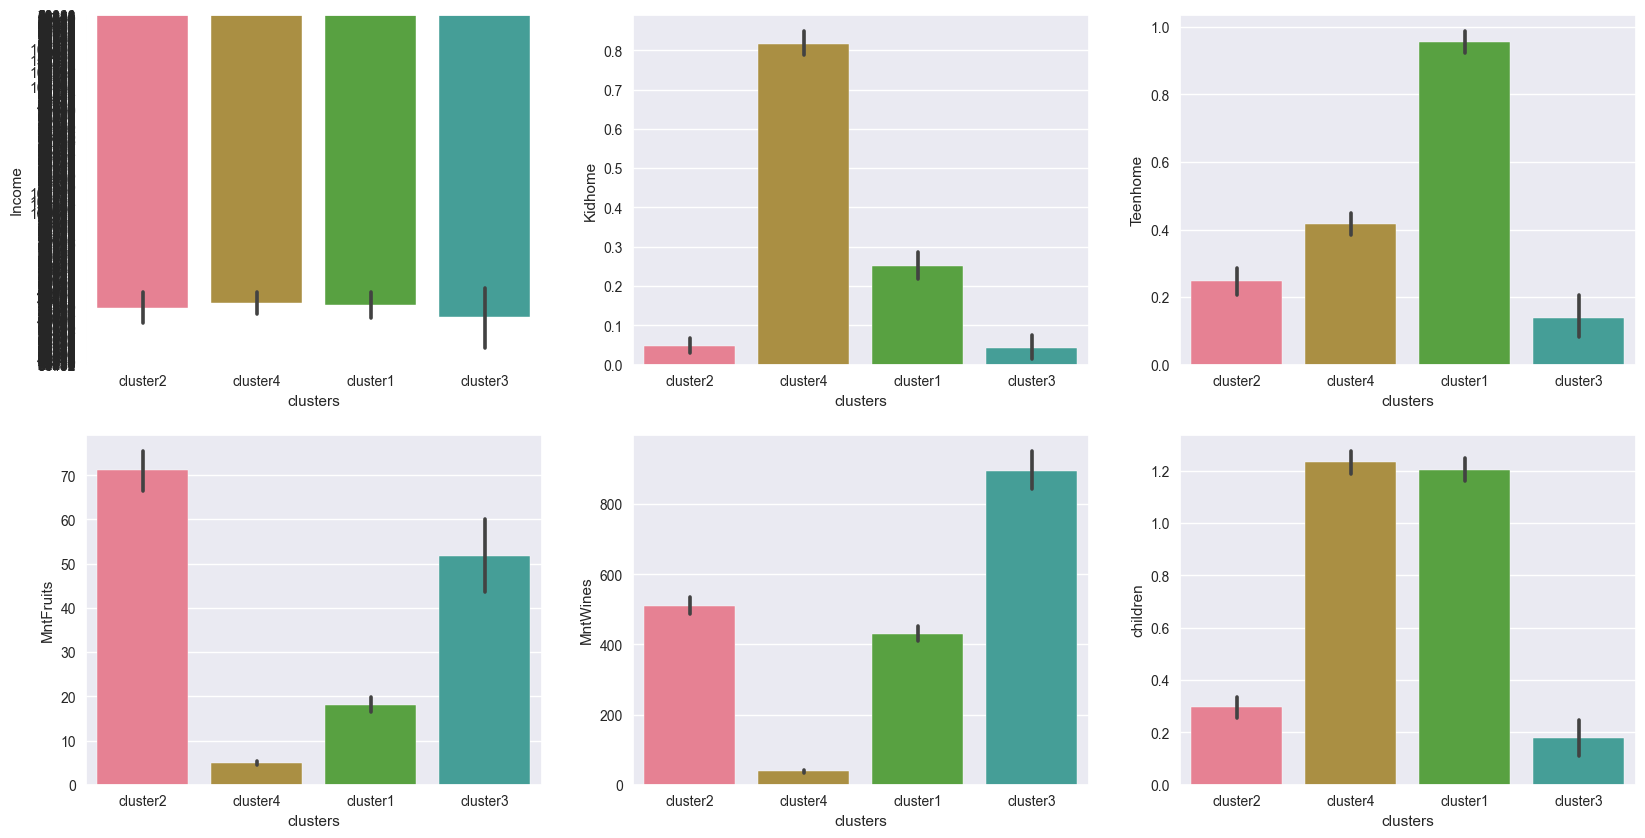

In [60]:
fig, axes = plt.subplots(2,3, figsize= (20, 10))
sns.barplot(data= data, x= 'clusters', y= 'Income', hue= 'clusters', ax= axes[0,0])
sns.barplot(data= data, x= 'clusters', y= 'Kidhome', hue= 'clusters', ax= axes[0,1])
sns.barplot(data= data, x= 'clusters', y= 'Teenhome', hue= 'clusters', ax= axes[0,2])
sns.barplot(data= data, x= 'clusters', y= 'MntFruits', hue= 'clusters', ax= axes[1,0])
sns.barplot(data= data, x= 'clusters', y= 'MntWines', hue= 'clusters', ax= axes[1,1])
sns.barplot(data= data, x= 'clusters', y= 'children', hue= 'clusters', ax= axes[1,2])

#### MODEL EVALUATION AND INTERPRETATION

FINDINGS:
IT CAN BE FOUND OUT THAT ALL THE CLUSTERS HAVE THE SAME SALARY HENCE THEY ALL EARN THE SAME AMOUNT. WHILE THOSE IN CLUSTER 4 HAS MORE KIDS, THOSE IN CLUSTER 1 HAS MORE TEENAGERS AT HOME. ALSO THOSE IN CLUSTER 2 AND 3 SPEND A LARGER % OF THEIR EARNINGS ON FRUITS AND WINES AND THIS IS DUE TO THE FACT THAT THEY HAVE GROWN UP CHILDREN WHILE THOSE IN CLUSTER 1 AND 4 SPEND A LARGER % OF KIDS AND TEENAGE THINGS AS A RESULT OF THE FACT THAT THEY HAVE KIDS AND TEENS AT HOME.

THEREFORE, COMPANIES WITH KIDS AND TEENAGE MATERIALS SHOULD CHANNEL THEIR PROMOTIONAL ACTIVITIES TOWARDS THOSE IN CLUSTER 1 AND 4 WHILE ORGANIZATIONS SELLING FRUITS AND WINES SHOULD CHANNEL THEIR ACTIVITIES TOWARDS THOSE IS CLUSTER 2 AND 3